In [14]:
import face_recognition as fr
import os
import cv2
import face_recognition
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from time import sleep

In [15]:

def get_encoded_faces():
    """
    looks through the faces folder and encodes all
    the faces

    :return: dict of (name, image encoded)
    """
    encoded = {}

    for dirpath, dnames, fnames in os.walk("./faces"):
        for f in fnames:
            if f.endswith(".jpg") or f.endswith(".png"):
                face = fr.load_image_file("faces/" + f)
                encoding = fr.face_encodings(face)[0]
                encoded[f.split(".")[0]] = encoding

    return encoded

In [16]:

def unknown_image_encoded(img):
    """
    encode a face given the file name
    """
    face = fr.load_image_file("faces/" + img)
    encoding = fr.face_encodings(face)[0]

    return encoding

In [17]:
def classify_face(im):
    """
    will find all of the faces in a given image and label
    them if it knows what they are

    :param im: str of file path
    :return: list of face names
    """
    faces = get_encoded_faces()
    faces_encoded = list(faces.values())
    known_face_names = list(faces.keys())

    img = cv2.imread(im, 1)
    #img = cv2.resize(img, (0, 0), fx=0.5, fy=0.5)
    #img = img[:,:,::-1]
 
    face_locations = face_recognition.face_locations(img)
    unknown_face_encodings = face_recognition.face_encodings(img, face_locations)

    face_names = []
    for face_encoding in unknown_face_encodings:
        # See if the face is a match for the known face(s)
        matches = face_recognition.compare_faces(faces_encoded, face_encoding)
        name = "Unknown"

        # use the known face with the smallest distance to the new face
        face_distances = face_recognition.face_distance(faces_encoded, face_encoding)
        best_match_index = np.argmin(face_distances)
        if matches[best_match_index]:
            name = known_face_names[best_match_index]

        face_names.append(name)

        for (top, right, bottom, left), name in zip(face_locations, face_names):
            # Draw a box around the face
            cv2.rectangle(img, (left-20, top-20), (right+20, bottom+20), (255, 0, 0), 2)

            # Draw a label with a name below the face
            cv2.rectangle(img, (left-20, bottom -15), (right+20, bottom+20), (255, 0, 0), cv2.FILLED)
            font = cv2.FONT_HERSHEY_DUPLEX
            cv2.putText(img, name, (left -20, bottom + 15), font, 1.0, (255, 255, 255), 2)
        screen = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)

        plt.imshow(screen)
        return face_names


   

['Bharath C S']


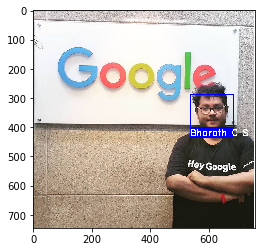

In [18]:
print(classify_face("test1.PNG"))
